In [52]:
#Authors: Prerak, Chirag, Sravya
#Final Project : NYC Property Sales Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,r2_score


In [2]:
#Load data
df_nyc = pd.read_csv('nyc-rolling-sales.csv')
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
#Checking for NA values
df_nyc.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [4]:
#Checking for duplicate Values
df_nyc.duplicated().sum()

0

In [5]:
#Summary of the dataset
df_nyc.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
#Converting the object datatype to numeric for the integer values in dataset
df_nyc['GROSS SQUARE FEET'] = pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET']= pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')
df_nyc['TAX CLASS AT TIME OF SALE'] = df_nyc['TAX CLASS AT TIME OF SALE'].astype('category')
df_nyc['TAX CLASS AT PRESENT'] = df_nyc['TAX CLASS AT PRESENT'].astype('category')
df_nyc['ZIP CODE'] = df_nyc['ZIP CODE'].astype('category')

In [7]:
#Filling the integer NULL values with column 'mean'
mean_square_feet = df_nyc['GROSS SQUARE FEET'].mean()
df_nyc['GROSS SQUARE FEET'].fillna(mean_square_feet, inplace=True)
mean_sale_price = df_nyc['SALE PRICE'].mean()
df_nyc['SALE PRICE'].fillna(mean_sale_price, inplace=True)

In [8]:
#Creating separate dataframes per borough for analyzing the sale prices in clusters
df_nyc_1 = df_nyc[df_nyc.BOROUGH==1]
df_nyc_2 = df_nyc[df_nyc.BOROUGH==2]
df_nyc_3 = df_nyc[df_nyc.BOROUGH==3]
df_nyc_4 = df_nyc[df_nyc.BOROUGH==4]
df_nyc_5 = df_nyc[df_nyc.BOROUGH==5]

df_nyc_1_n = df_nyc_1.drop(['BOROUGH','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','SALE DATE','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','APARTMENT NUMBER','ADDRESS','BUILDING CLASS AT TIME OF SALE','ZIP CODE','EASE-MENT'],axis=1)
df_nyc_2_n = df_nyc_2.drop(['BOROUGH','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','SALE DATE','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','APARTMENT NUMBER','ADDRESS','BUILDING CLASS AT TIME OF SALE','ZIP CODE','EASE-MENT'],axis=1)
df_nyc_3_n = df_nyc_3.drop(['BOROUGH','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','SALE DATE','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','APARTMENT NUMBER','ADDRESS','BUILDING CLASS AT TIME OF SALE','ZIP CODE','EASE-MENT'],axis=1)
df_nyc_4_n = df_nyc_4.drop(['BOROUGH','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','SALE DATE','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','APARTMENT NUMBER','ADDRESS','BUILDING CLASS AT TIME OF SALE','ZIP CODE','EASE-MENT'],axis=1)
df_nyc_5_n = df_nyc_5.drop(['BOROUGH','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','SALE DATE','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','APARTMENT NUMBER','ADDRESS','BUILDING CLASS AT TIME OF SALE','ZIP CODE','EASE-MENT'],axis=1)


df_nyc_1_n.NEIGHBORHOOD = le.fit_transform(df_nyc_1_n.NEIGHBORHOOD)
df_nyc_2_n.NEIGHBORHOOD = le.fit_transform(df_nyc_2_n.NEIGHBORHOOD)
df_nyc_3_n.NEIGHBORHOOD = le.fit_transform(df_nyc_3_n.NEIGHBORHOOD)
df_nyc_4_n.NEIGHBORHOOD = le.fit_transform(df_nyc_4_n.NEIGHBORHOOD)
df_nyc_5_n.NEIGHBORHOOD = le.fit_transform(df_nyc_5_n.NEIGHBORHOOD)

In [9]:
#Renaming the Borough with their categorical values
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 1] = 'Manhattan'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 2] = 'Bronx'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 3] = 'Brooklyn'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 4] = 'Queens'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 5] = 'Staten Island'

In [10]:
#Loading Table info
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null category
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null category
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  58296 non-null floa

In [11]:
#Checking for duplication in columns
sum(df_nyc.duplicated(df_nyc.columns))

0

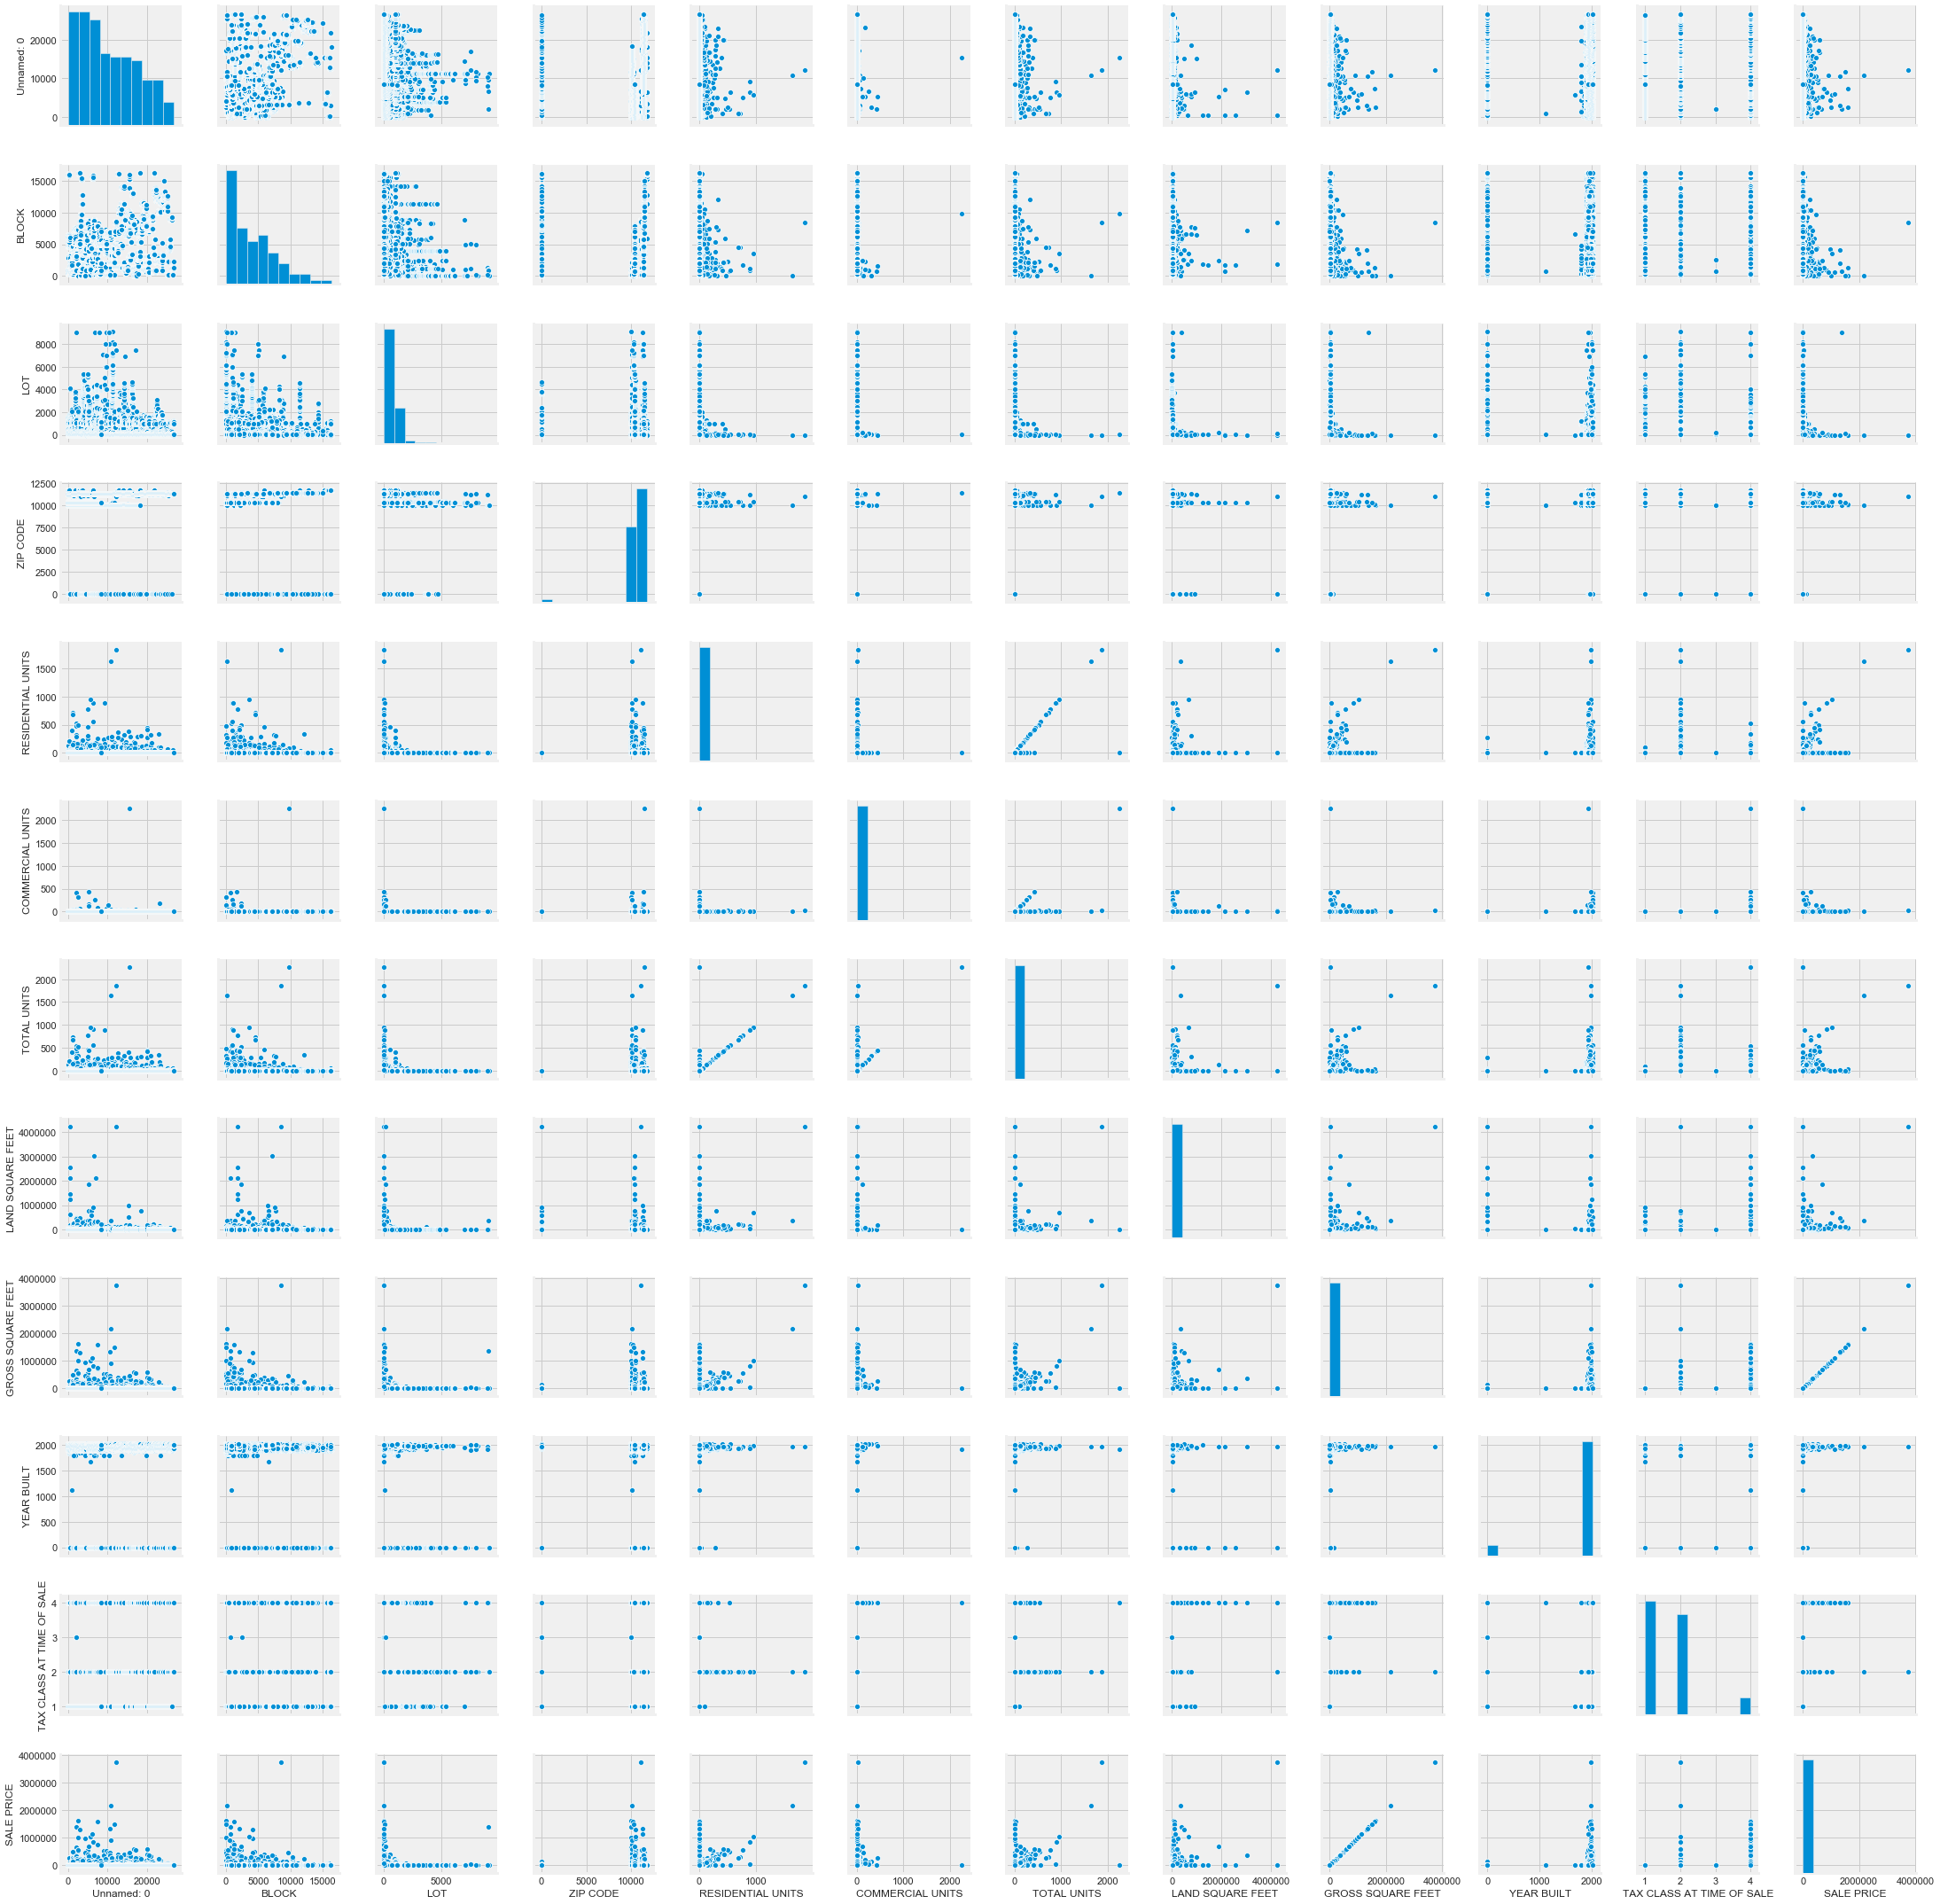

In [12]:
#Finding the correlation between the features among the table
sns.pairplot(df_nyc)

In [14]:
#Removing the outliers to better fit the regression models
df_nyc=df_nyc[df_nyc['SALE PRICE']<200000000]
df_nyc=df_nyc[df_nyc['YEAR BUILT']>1875]
df_nyc=df_nyc[df_nyc['LAND SQUARE FEET']<20000]
df_nyc=df_nyc[df_nyc['GROSS SQUARE FEET'] < 20000]
print('After removing outliers {}'.format(df_nyc.shape))
# Only a handful of properties with 0 total units are remaining and they will now be deleted
df_nyc = df_nyc[(df_nyc['TOTAL UNITS'] > 0) & (df_nyc['TOTAL UNITS'] < 50)] 
#Remove df_nyc where commercial + residential doesn't equal total units
df_nyc = df_nyc[df_nyc['TOTAL UNITS'] == df_nyc['COMMERCIAL UNITS'] + df_nyc['RESIDENTIAL UNITS']]
print('After removing total units courrupted df_nyc {}'.format(df_nyc.shape))
# Removes all NULL values
df_nyc = df_nyc[df_nyc['LAND SQUARE FEET'].notnull()] 
df_nyc = df_nyc[df_nyc['GROSS SQUARE FEET'].notnull()] 
# Only a handful of properties with 0 total units are remaining and they will now be deleted
df_nyc = df_nyc[(df_nyc['TOTAL UNITS'] > 0) & (df_nyc['TOTAL UNITS'] < 50)] 
print('After removing nulls and total unites<50 is {}'.format(df_nyc.shape))

After removing outliers (52906, 22)
After removing total units courrupted df_nyc (48148, 22)
After removing nulls and total unites<50 is (48148, 22)


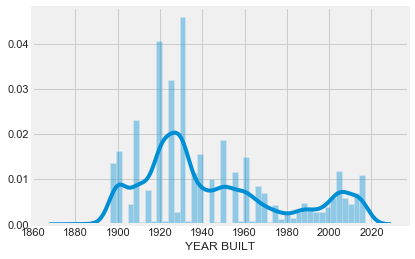

In [15]:
#Distribution of Properties built over the years in NYC
sns.distplot(a=df_nyc['YEAR BUILT'],kde=True,hist=True)

In [16]:
#Creating a new column namely 'Seasons'
#TO analyze the trends of Sale Price in seasons i.e. Fall, Winter, Summer, Spring
def get_season(x):
    if x==1:
        return 'Summer'
    elif x==2:
        return 'Fall'
    elif x==3:
        return 'Winter'
    elif x==4:
        return 'Spring'
    else:
        return ''
df_nyc['seasons']=df_nyc['SALE DATE'].apply(lambda x:x.month)
df_nyc['seasons']=df_nyc['seasons'].apply(lambda x:(x%12+3)//3)
df_nyc['seasons']=df_nyc['seasons'].apply(get_season)

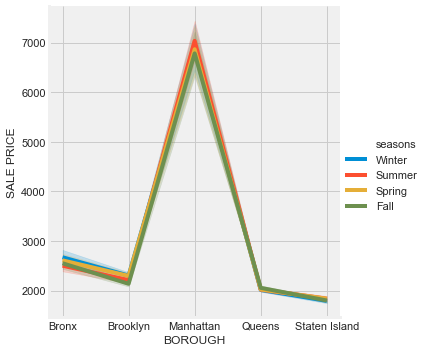

In [17]:
#Regression plot for the seasons 
sns.relplot(x="BOROUGH", y="SALE PRICE",hue='seasons' ,kind='line', data=df_nyc,legend='full');

<Figure size 1296x576 with 0 Axes>

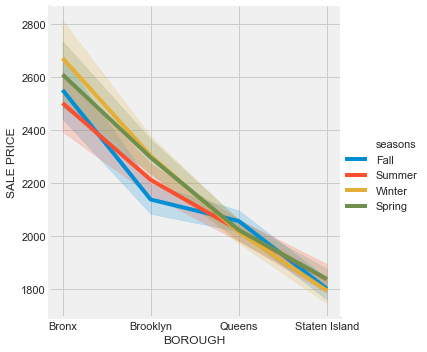

In [18]:
#Sale Price distribution across different seasons
plt.figure(figsize=(18,8))
df_wo_manhattan=df_nyc.loc[df_nyc['BOROUGH']!='Manhattan']
#Remove Manhattan to get a good graphs 
sns.relplot(x="BOROUGH", y="SALE PRICE",hue='seasons' ,kind="line", data=df_wo_manhattan,legend='full');

In [19]:
#Creating column for building age 
df_nyc['Building Age During Sale']=df_nyc['SALE DATE'].apply(lambda x:x.year)
df_nyc['Building Age During Sale']=df_nyc['Building Age During Sale']-df_nyc['YEAR BUILT']
df_nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,seasons,Building Age During Sale
84542,8408,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,3020.0,1800.0,1997,1,B9,1800.0,2016-12-01,Summer,19
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,2400.0,2575.0,1998,1,B9,2575.0,2016-11-28,Spring,18
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,2498.0,2377.0,1998,1,B9,2377.0,2017-04-21,Fall,19
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,4000.0,1496.0,1925,1,B2,1496.0,2017-07-05,Winter,92
84547,8413,Staten Island,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,1,10796.0,2400.0,2006,4,P9,2400.0,2016-10-27,Spring,10


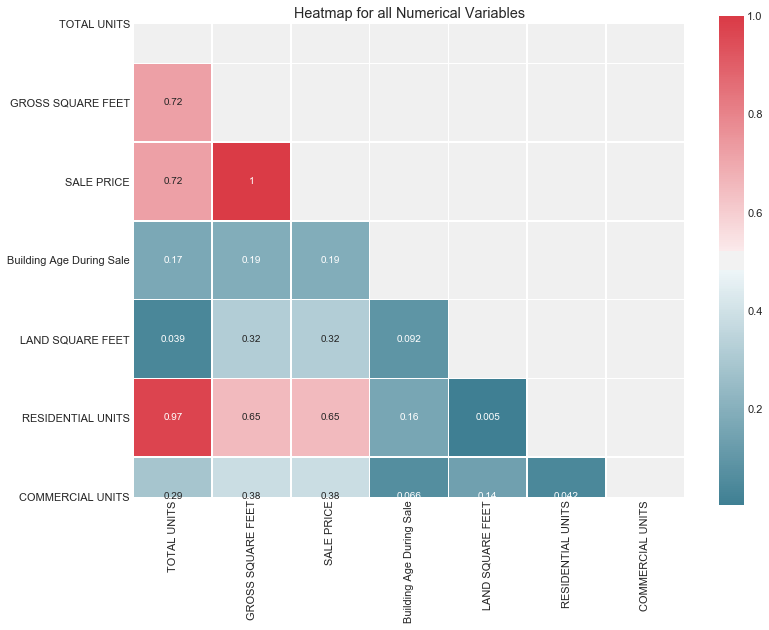

In [20]:

# Correlation Matrix

# Compute the correlation matrix
d= df_nyc[['TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE', 'Building Age During Sale', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS']]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Heatmap for all Numerical Variables')
plt.show()

In [21]:
#Feature selection for the regression models
column_model=['BOROUGH','BUILDING CLASS CATEGORY','COMMERCIAL UNITS','GROSS SQUARE FEET',
               'SALE PRICE','Building Age During Sale','LAND SQUARE FEET','RESIDENTIAL UNITS','seasons']
data_model=df_nyc.loc[:,column_model]

In [22]:
#Applying one-hot encoing to the categorical variables 
one_hot_features=['BOROUGH','BUILDING CLASS CATEGORY','seasons']
#Check how many columns will be created
longest_str=max(one_hot_features,key=len)
total_num_of_unique_cat=0
for feature in one_hot_features:
    num_unique=len(data_model[feature].unique())
    print('{} : {} unique categorical values '.format(feature,num_unique))
    total_num_of_unique_cat+=num_unique
print('Total {} will be added with one hot encoding'.format(total_num_of_unique_cat))

BOROUGH : 5 unique categorical values 
BUILDING CLASS CATEGORY : 36 unique categorical values 
seasons : 4 unique categorical values 
Total 45 will be added with one hot encoding


In [23]:
#Applying data transformation to wide format for the categorical variables to fit the model
one_hot_encoded = pd.get_dummies(data_model[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48148 entries, 0 to 84547
Data columns (total 45 columns):
BOROUGH_Bronx                                                           48148 non-null uint8
BOROUGH_Brooklyn                                                        48148 non-null uint8
BOROUGH_Manhattan                                                       48148 non-null uint8
BOROUGH_Queens                                                          48148 non-null uint8
BOROUGH_Staten Island                                                   48148 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         48148 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         48148 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       48148 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           48148 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [24]:
#Enteries with Sale Price 0 in the dataset
df_nyc[df_nyc['SALE PRICE']==0.0].sum().count()

23

In [25]:
#Concatinating encoded variables with the features in the dataset
data_model.drop(one_hot_features,axis=1,inplace=True)
data_model=pd.concat([data_model,one_hot_encoded],axis=1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,...,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
0,0,6440.0,6440.0,117,1633.0,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3,18690.0,18690.0,116,4616.0,28,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,7803.0,7803.0,116,2212.0,16,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,6794.0,6794.0,103,2272.0,10,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,4615.0,4615.0,116,2369.0,6,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


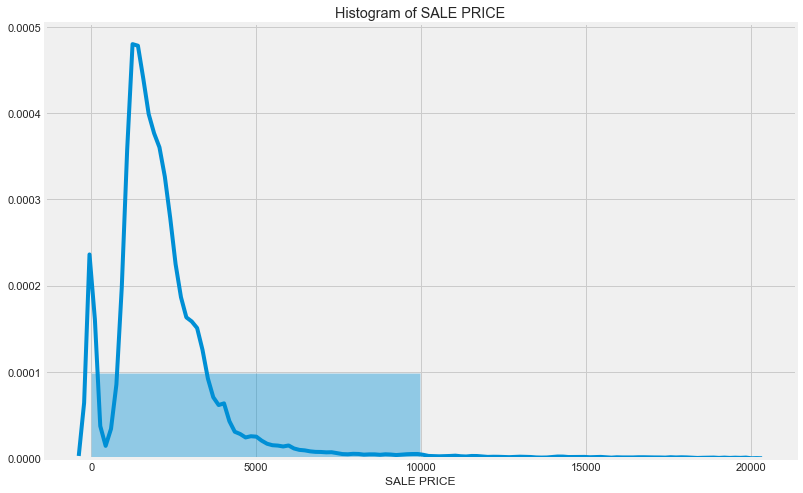

In [26]:
#Distribution of Sale Prices
plt.figure(figsize=(12,8))
g=sns.distplot(data_model['SALE PRICE'],bins=2)
plt.title('Histogram of SALE PRICE')
plt.show()

In [27]:
#Visualizing the encoded dataframe
data_model=data_model[data_model['SALE PRICE']!=0]
#data_model_SALE_ZEROES=data_model
#data_model.head()
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,...,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
0,0,6440.0,6440.0,117,1633.0,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3,18690.0,18690.0,116,4616.0,28,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,7803.0,7803.0,116,2212.0,16,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,6794.0,6794.0,103,2272.0,10,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,4615.0,4615.0,116,2369.0,6,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#Creating a copy
new_data_model = data_model

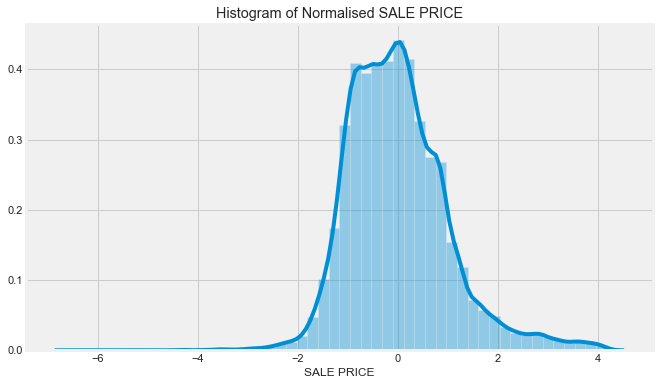

In [29]:
#Normalizing the target variable 'SALE PRICE'
new_data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(new_data_model['SALE PRICE']).values.reshape(-1,1))
plt.figure(figsize=(10,6))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

In [30]:
#Normalizing
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1

# Take the log and standardise
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).values.reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).values.reshape(-1,1))

In [31]:
#Normalizing
data_model['GROSS SQUARE FEET'] = data_model['GROSS SQUARE FEET'] + 1
data_model['LAND SQUARE FEET'] = data_model['LAND SQUARE FEET'] + 1

# Take the log and standardise
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET']).values.reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET']).values.reshape(-1,1))

In [32]:
#Loading the dataframe
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,...,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
0,-0.297026,2.092816,2.092550,117,-1.083568,1.786629,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,4.868991,4.053676,4.052662,116,1.125635,5.319633,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2.285983,2.446117,2.445732,116,-0.438452,4.121999,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.297026,2.191292,2.190994,103,-0.381555,3.145836,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.297026,1.479623,1.479535,116,-0.292674,2.132299,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#Copy of datamodel
X = data_model

In [34]:
#Split into training and testing
y=data_model['SALE PRICE']
X=data_model.drop('SALE PRICE',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print('Size of Training data: {} \n Size of test data: {}'.format(X_train.shape[0],X_test.shape[0]))

Size of Training data: 35402 
 Size of test data: 8851


In [35]:
#Linear regression with RMSE and R2 score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred=linear_reg.predict(X_test)

cv_scores_linreg = cross_val_score(linear_reg, X_train, y_train, cv=5)
r2=linear_reg.score(X_test, y_test)
print("R^2: {}".format(r2))
adj_r2 = 1 - (1 - r2 ** 2) * ((X_train.shape[1] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
print("Adjusted R^2: {}".format(adj_r2))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 0.9999999000632704
Adjusted R^2: 0.9999999997229555
Root Mean Squared Error: 0.0003112860608869684
Average 5-Fold CV Score: 0.9999999448211689
[0.99999987 0.99999997 0.99999997 0.99999995 0.99999996]


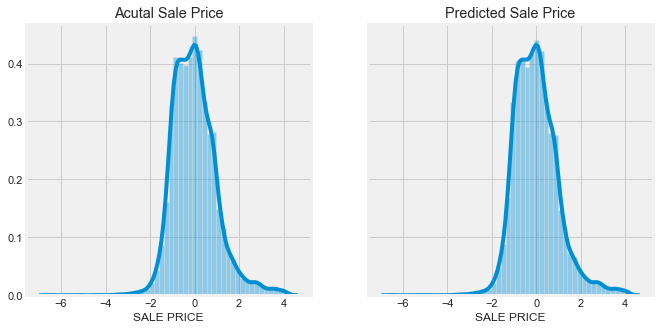

In [36]:
#Visualize the actual and predicted variables
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,5))
ax[0].set_title('Acutal Sale Price')
ax[1].set_title('Predicted Sale Price')
f1 = sns.distplot(y_test,ax=ax[0])
f2 = sns.distplot(y_pred,ax=ax[1])
plt.xlabel('SALE PRICE')
plt.show()

In [37]:
#Ridge algorithm
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alpha_ridge = [0.000001,0.0001,.001,1]
for item in alpha_ridge:
    modelt = Ridge(alpha=item,copy_X=True, fit_intercept=True, max_iter=None,
          normalize=False, random_state=None, solver='auto', tol=0.001)
    modelt.fit(X_train, y_train)
    y_predt = modelt.predict(X_test) 

   # print(item,'r2',modelt.score(val_X, val_y))####r2 score
    #print('rmse',(mean_squared_error(val_y, y_predt))**0.5)
   # print('explained variance',explained_variance_score(val_y,y_predt))
    
model2 = Ridge(alpha=0.000001,copy_X=True, fit_intercept=True, max_iter=None,
          normalize=False, random_state=None, solver='auto', tol=0.001)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test) 

print('r2',model2.score(X_test, y_test))####r2 score
print('rmse',(mean_squared_error(y_test, y_pred2))**0.5)

r2 0.9999999000632676
rmse 0.000311286065547605


In [38]:
#Lasso algorithm
from sklearn import linear_model
alpha_ridge = [0.000001,0.0001,.001,1]
for item in alpha_ridge:
    modelt = linear_model.Lasso(alpha=item, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
    modelt.fit(X_train, y_train)
    y_predt = modelt.predict(X_test) 

   # print(item,'r2',modelt.score(val_X, val_y))####r2 score
   # print('rmse',(mean_squared_error(val_y, y_predt))**0.5)
  #  print('explained variance',explained_variance_score(val_y,y_predt))
    
model3 = linear_model.Lasso(alpha=0.000005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
                            
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test) 

print('r2',model3.score(X_test, y_test))####r2 score
print('rmse',(mean_squared_error(y_test, y_pred3))**0.5)

r2 0.9999998677284107
rmse 0.00035812149857764996


In [39]:
#Random Forest Regressor Algorithm
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test) 

print('r2',model4.score(X_test, y_test))####r2 score
print('rmse',(mean_squared_error(y_test, y_pred4))**0.5)

r2 0.9998843480808657
rmse 0.010589453054596031


In [40]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.05, max_depth = 1, loss='ls')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

0.9703981251755783
0.028702084103693872


In [41]:
#AdaBoost Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
adar = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators = 600)
adar.fit(X_train, y_train)
y_pred = adar.predict(X_test)
adar.score(X_train, y_train)

0.9999999299448682

In [42]:
#K-means algorithm
X = df_nyc[['BOROUGH','SALE PRICE']]

X['BOROUGH'] = le.fit_transform(X['BOROUGH'])

kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0)

y_kmeans = kmeans.fit_predict(X)

y_kmeans

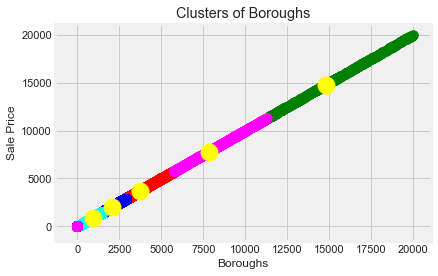

In [47]:
#Visualizing the clusters from K-mean algorithm
plt.scatter(X[y_kmeans==0], X[y_kmeans==0], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1], X[y_kmeans==1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2], X[y_kmeans==2], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3], X[y_kmeans==3], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4], X[y_kmeans==4], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Boroughs')
plt.xlabel('Boroughs')
plt.ylabel('Sale Price')
plt.show()

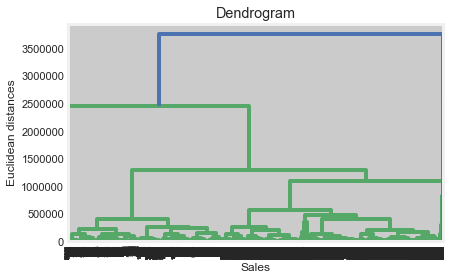

In [50]:
#Dendograms for the Boroughs
dendrogram = sch.dendrogram(sch.linkage(df_nyc_3_n, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Sales')
plt.ylabel('Euclidean distances')
plt.show()

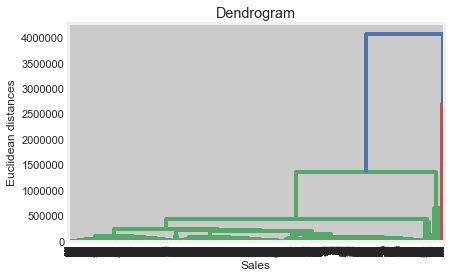

In [48]:
#Dendograms for the Boroughs
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_nyc_2_n, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Sales')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
#Save clean data to load into Tableau Dashboard
df_nyc.to_csv('CleanNYCPropertySales.csv')

df_nyc.to_csv('CleanSeasonNYCSales.csv')